## Boston Houses Analysis for Coursera IBM Statistic Course Excercise

Project Scenario: You are a Data Scientist at a housing agency in Boston, MA. You have been given access to a dataset on housing prices derived from the U.S. Census Service to present insights to senior management. Based on your expertise in Statistics, what information can you provide to help them make an informed decision? Senior management would like to have some insights on the following:

Is there a significant difference in the median value of homes bounded by the Charles River or not?

Is there any difference in the average home values for each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between nitric oxide concentrations and the proportion of non-retail commercial acres per town?

What is the impact of an additional weighted distance to the five employment centers in Boston on the median value of owner-occupied homes?

Using appropriate charts and tables, generate basic statistics and visualizations that you believe will be useful for senior management to provide important insights given the question they are asking. Include an explanation of each statistic in your charts.

## Data

CRIM: Per capita crime rate by town.

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.

INDUS: Proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (1 if the tract bounds the river; 0 otherwise).

NOX: Nitric oxide concentration (parts per 10 million).

RM: Average number of rooms per dwelling.

AGE: Proportion of owner-occupied units built before 1940.

DIS: Weighted distances to five Boston employment centers.

RAD: Index of accessibility to radial highways.

TAX: Full-value property tax rate per $10,000.

PTRATIO: Pupil-teacher ratio by town.

LSTAT: Lower status of the population (percent).

MEDV: Median value of owner-occupied homes in $1,000s.

In [2]:
# Load Data 
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Data Exploration

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median value of owner-occupied homes')

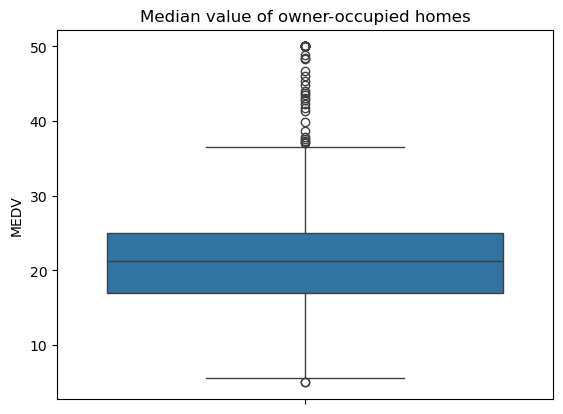

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=boston_df, y='MEDV')
ax.set_title("Median value of owner-occupied homes")

From the box plot we can see that median value of Median value of owner-occupied homes is around 20 and 25. And we can appreciate several outliers 

Text(0.5, 0, 'Near Charles river (0:no, 1:yes)')

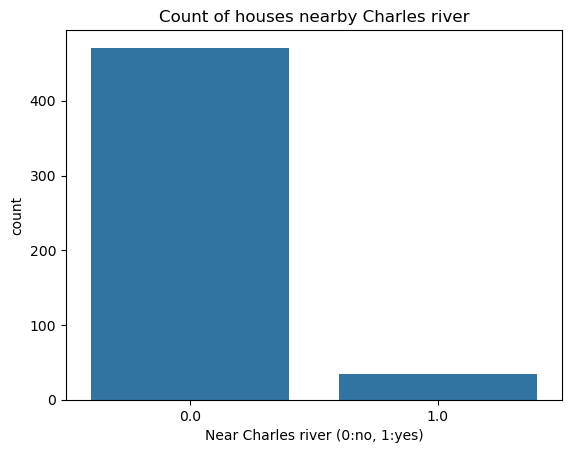

In [7]:
ax = sns.countplot(data=boston_df, x=boston_df['CHAS'])
ax.set_title("Count of houses nearby Charles river")
ax.set_xlabel("Near Charles river (0:no, 1:yes)")

The chart illustrates that the majority of the houses are far from the Charles River.

Text(0, 0.5, 'Median Value of Homes ($1000s)')

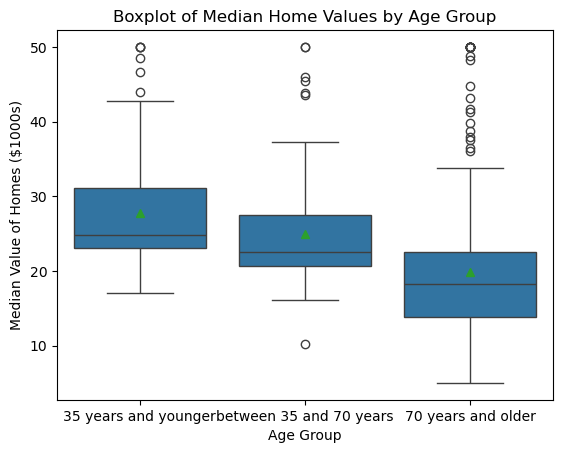

In [8]:
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

#Create the boxplot
ax = sns.boxplot(boston_df, x='AGE_GROUP', y='MEDV', showmeans=True)
ax.set_title("Boxplot of Median Home Values by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Median Value of Homes ($1000s)")

At firts sight, there are some differences between the mean values of the three groups. Later, we will perform an ANOVA test to determine if there are statistically significant differences.

Text(0, 0.5, 'Nitric Oxide concentration (parts per 10 million)')

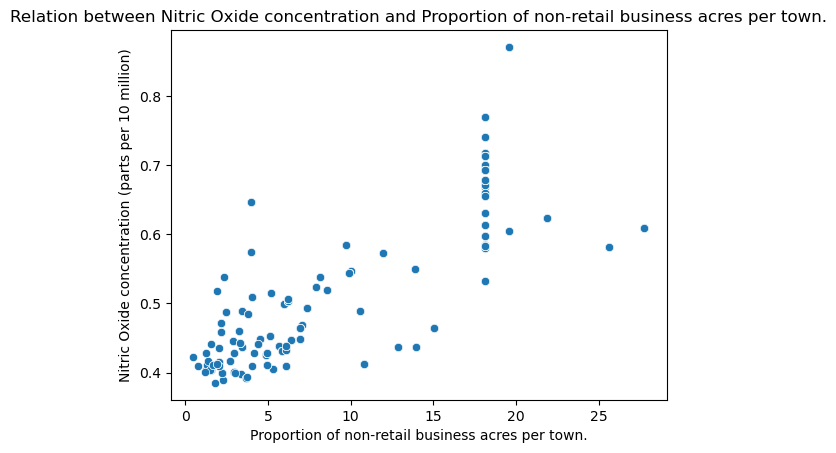

In [9]:
ax = sns.scatterplot(boston_df, x='INDUS', y='NOX')
ax.set_title("Relation between Nitric Oxide concentration and Proportion of non-retail business acres per town.")
ax.set_xlabel("Proportion of non-retail business acres per town.")
ax.set_ylabel("Nitric Oxide concentration (parts per 10 million)")

Some degree of positive linear relation is present

Text(0.5, 0, 'Pupil-Teacher Ratio')

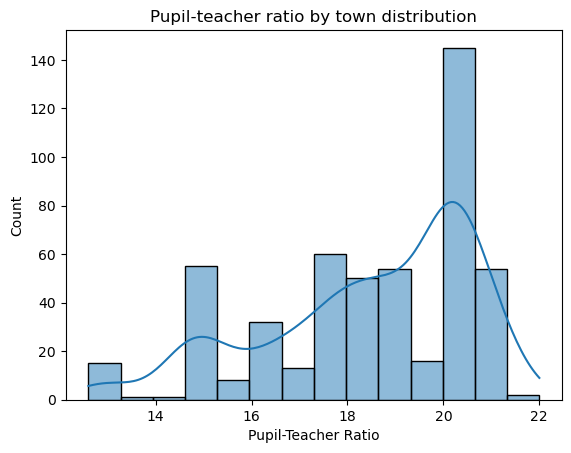

In [16]:
ax = sns.histplot(boston_df, x='PTRATIO', kde=True)
ax.set_title("Pupil-teacher ratio by town distribution")
ax.set_xlabel("Pupil-Teacher Ratio")

The distribution of the pupil-teacher ratio by town is skewed to the right, with a mean around 20

## Hypothesis testing

In [11]:
from scipy import stats

### Is there a significant difference in the median value of homes bounded by the Charles River or not?

$\mu_0$: Mean value of houses nearby Charles river

$\mu_1$: Mean value of houses far from Charles river

#### $H_0: \mu_0 = \mu_1$

#### $H_1: \mu_0 \ne \mu_1$

#### $\alpha = 0.05$

In [15]:
# Levine test for ensure equal variances
lev_stat, p_value_levene = stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])
print(f"Levene Statistic: {lev_stat} \n")
print(f"Levene Test  P-Value: {p_value_levene} \n")
print("The variances are statistically differents, so equal variances arguments must be false \n")

# T Test
t_statistic, p_value = stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False)
print(f"T-statistic: {t_statistic} \n")
print(f"P-value: {p_value} \n")

Levene Statistic: 4.590342218715871 

Levene Test  P-Value: 0.03263097600633006 

The variances are statistically differents, so equal variances arguments must be false 

T-statistic: 3.113291312794837 

P-value: 0.0035671700981375174 



P-value < $\alpha$, therefore we reject the null hypothesis and we can say that there are significat difference in the median values of homes bounded Charles river and not

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

$\mu_0$: Mean value of 35 years and younger

$\mu_1$: Mean value of between 35 and 70 years

$\mu_2$: Mean value of 70 years and older

#### $H_0: \mu_0 = \mu_1 = \mu_2$

#### $H_1$: At least one mean is different

#### $\alpha = 0.05$

In [23]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, type=2)
print(anova_table)

                 df        sum_sq      mean_sq         F        PR(>F)
C(AGE_GROUP)    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual      503.0  37314.563532    74.184023       NaN           NaN


$1.710501e-15 < \alpha$, therefore we reject the null hypothesis and we can conclude that there are difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

### Can we conclude that there is no relationship between nitric oxide concentrations and the proportion of non-retail commercial acres per town?

#### $H_0$: There is no statistically significant correlation between nitric oxide concentrations and the proportion of non-retail commercial acres per town

#### $H_1$: There is a significant correlation between the nitric oxide concentrations and the proportion of non-retail commercial acres per town

#### $\alpha = 0.05$

In [25]:
r, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation Coefficient: {r} \n")
print(f"P-value: {p_value} \n")

Pearson Correlation Coefficient: 0.7636514469209149 

P-value: 7.913361061242812e-98 



$P-value < \alpha$, therefore we reject the null hypothesis and we can say that exist a significant correlation (positive correlation) between the nitric oxide concentrations and the proportion of non-retail commercial acres per town. 

#### What is the impact of an additional weighted distance to the five employment centers in Boston on the median value of owner-occupied homes?

In [26]:
X = boston_df['DIS']
X = sm.add_constant(X)
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        17:15:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Constant (22.499, p < 0.0001) and DIS (5.795, p < 0.0001): Both the intercept and the slope are statistically significant (p-value < 0.05), indicating strong evidence that these coefficients are different from zero. DIS: 1.0916: This coefficient shows the effect of weighted distance on the median home value. A positive coefficient indicates that as the weighted distance increases by one unit, the median home value increases by approximately $1,091.60.